This notebook walks through how to access hyperspectral Rrs data from NASA's PACE satellite, convert that Rrs data into 
chlorophyll concentrations (chlorophyll a, chlorophyll b, chlorophyll c, and photoprotective carotenoids (PPC)), and then plot
the cholorphyll concentration using a color map in a map with latitude and longitude coordinates. 

Using the environment.yml file in the git repository, create a new conda environment:

You need an Earthdata account to access PACE data. You can create an account here: https://urs.earthdata.nasa.gov
See part one (Setup) and two (NASA Earthdata Authentication) on this tutorial: https://oceancolor.gsfc.nasa.gov/resources/docs/tutorials/notebooks/oci_data_access/

In [2]:
import earthaccess

In [3]:
auth = earthaccess.login(persist=True)

Next, import utils.

In [2]:
import utils

First download data Rrs data from PACE using utils' load_rrs method. This method will search PACE for all of the Rrs data within a certain time span and at a desired resolution. The time span is passed in as a tuple of string with the format 'YYYY-MM-DD'. The resolution is passed in as a string. The only resolutions availble are '1deg', '0p1deg', and '4km'. The data files are in nc format and are saved to a folder called 'data'. The method returns a list of file paths to each individual data file that is downloaded. 

In [3]:
paths = utils.load_rrs(('2024-06-12','2024-06-15'), '4km')
paths

Granules found: 4
 Getting 4 granules, approx download size: 4.67 GB


QUEUEING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/4 [00:00<?, ?it/s]

['data/PACE_OCI.20240612.L3m.DAY.RRS.V1_0_0.Rrs.4km.NRT.nc',
 'data/PACE_OCI.20240613.L3m.DAY.RRS.V1_0_0.Rrs.4km.NRT.nc',
 'data/PACE_OCI.20240614.L3m.DAY.RRS.V1_0_0.Rrs.4km.NRT.nc',
 'data/PACE_OCI.20240615.L3m.DAY.RRS.V1_0_0.Rrs.4km.NRT.nc']

After downloading the files you can create an xarray dataset using utils' create_rrs_dataset method. This method takes in either a single file path or a string of file paths along with coordinates to create a box of data. If a list of multiple file paths is used, the method returns the average Rrs values at each coordinate averaged by date. The order of parameters passed in is the file path or list of file paths, the northern boundary of the box, the southern boundary, the western boundary, and finally the eastern boundary. Latitude coordinates range from -90 to 90, longitude coordinates range from -180 to 180. 

In [4]:
# This creates an xarray dataset containing Rrs values from 2024-06-12 within the coordinates 48.6N, 48.1N, 124.7W, 122.7W. 
# This dataset coverst the Straight of Juan de Fuca
dataset = utils.create_rrs_dataset(paths[0], 48.6, 48.1, -124.7, -122.7)
dataset

<xarray.DataArray 'Rrs' (lat: 12, lon: 48, wavelength: 184)> Size: 424kB
[105984 values with dtype=float32]
Coordinates:
  * wavelength  (wavelength) float64 1kB 339.0 341.0 344.0 ... 714.0 717.0 719.0
  * lat         (lat) float32 48B 48.56 48.52 48.48 48.44 ... 48.19 48.15 48.1
  * lon         (lon) float32 192B -124.7 -124.6 -124.6 ... -122.8 -122.8 -122.7
Attributes:
    long_name:      Remote sensing reflectance
    units:          sr^-1
    standard_name:  surface_ratio_of_upwelling_radiance_emerging_from_sea_wat...
    valid_min:      -30000
    valid_max:      25000
    display_scale:  linear
    display_min:    0.0
    display_max:    0.025

In [5]:
# This creates an xarray dataset containing the average Rrs values from 2024-06-10 to 2024-06-15 within the coordinates 48.6N, 
# 48.1N, 124.7W, 122.7W. 
avg_dataset = utils.create_rrs_dataset(paths, 48.6, 48.1, -124.7, -122.7)
avg_dataset

<xarray.DataArray 'Rrs' (lat: 12, lon: 48, wavelength: 184)> Size: 424kB
array([[[-3.7726648e-03, -3.1719990e-03, -3.1666583e-04, ...,
         -4.1199973e-04, -3.4799924e-04, -2.2466604e-04],
        [-2.8733325e-03, -2.2633325e-03,  5.5933371e-04, ...,
         -4.4399872e-04, -3.8266680e-04, -2.6733303e-04],
        [-2.8733325e-03, -2.2633325e-03,  5.5933371e-04, ...,
         -4.4399872e-04, -3.8266680e-04, -2.6733303e-04],
        ...,
        [-3.4339987e-03, -2.9140003e-03, -3.8800016e-04, ...,
         -4.0599890e-04, -3.3299997e-04, -1.8499792e-04],
        [-3.4339987e-03, -2.9140003e-03, -3.8800016e-04, ...,
         -4.0599890e-04, -3.3299997e-04, -1.8499792e-04],
        [-2.8749984e-03, -2.1160003e-03,  4.6700239e-04, ...,
         -5.7599880e-04, -5.0799735e-04, -3.6299974e-04]],

       [[-2.7469993e-03, -2.1499991e-03,  9.3400106e-04, ...,
         -2.7149916e-04, -1.9399915e-04, -4.6999194e-05],
        [-2.7469993e-03, -2.1499991e-03,  9.3400106e-04, ...,
         -2.7149916e-04, -1.9399915e-04, -4.6999194e-05],
        [-2.1184999e-03, -1.4974996e-03,  1.5510013e-03, ...,
         -3.4999941e-04, -3.0499883e-04, -1.7249864e-04],
...
        [-7.2619990e-03, -6.0199983e-03, -3.0879974e-03, ...,
         -2.9600039e-04, -2.2999942e-04, -9.9997967e-05],
        [-6.9239996e-03, -5.9500001e-03, -3.2319985e-03, ...,
         -3.2800063e-04, -2.7599931e-04, -1.5399978e-04],
        [-6.6759996e-03, -5.5119991e-03, -2.8579980e-03, ...,
         -3.6599860e-04, -3.3199787e-04, -2.2999942e-04]],

       [[ 5.7000108e-04,  9.8350085e-04,  3.6500003e-03, ...,
          1.3200101e-04, -5.2499585e-05, -3.7498772e-05],
        [ 7.2499998e-03,  7.1040019e-03,  8.3319992e-03, ...,
         -1.6460009e-03, -1.6079992e-03, -1.3299994e-03],
        [ 7.2499998e-03,  7.1040019e-03,  8.3319992e-03, ...,
         -1.6460009e-03, -1.6079992e-03, -1.3299994e-03],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [-7.0680007e-03, -6.3979998e-03, -3.8499981e-03, ...,
         -3.4799799e-04, -2.9399991e-04, -1.8399954e-04],
        [-7.0680007e-03, -6.3979998e-03, -3.8499981e-03, ...,
         -3.4799799e-04, -2.9399991e-04, -1.8399954e-04]]], dtype=float32)
Coordinates:
  * wavelength  (wavelength) float64 1kB 339.0 341.0 344.0 ... 714.0 717.0 719.0
  * lat         (lat) float32 48B 48.56 48.52 48.48 48.44 ... 48.19 48.15 48.1
  * lon         (lon) float32 192B -124.7 -124.6 -124.6 ... -122.8 -122.8 -122.7

Now that we have hyperspectral Rrs values we can use utils' calculate_pigments method to calculate the cholorphyll concentrations for each coordinate within the dataset's coordinate range. This method will return an xarray dataset with pigment values for chla, chlb, chlc, and ppc. This calculates the pigment values for each coordinate/pixel in the dataset. Calculating the pigments can take a long time; the number of pixels calculated and the total number of pixels is displayed.

In [7]:
# This calculates pigments using the average Rrs from 2024-06-12 to 2024-06-15
pigments = utils.calculate_pigments(avg_dataset)
pigments

num pixels:  576
Progress: 576/576


<xarray.Dataset> Size: 19kB
Dimensions:  (lat: 12, lon: 48)
Coordinates:
  * lat      (lat) float32 48B 48.56 48.52 48.48 48.44 ... 48.19 48.15 48.1
  * lon      (lon) float32 192B -124.7 -124.6 -124.6 ... -122.8 -122.8 -122.7
Data variables:
    chla     (lat, lon) float64 5kB 2.713 2.401 2.4 2.587 ... 0.0 4.825 4.821
    chlb     (lat, lon) float64 5kB 0.1248 0.1624 0.1636 ... 0.0 9.933 10.42
    chlc     (lat, lon) float64 5kB 0.7511 0.7738 0.7778 ... 0.0 3.829 3.872
    ppc      (lat, lon) float64 5kB 0.2824 0.3859 0.3839 ... 0.0 0.1651 0.1647

After the pigments have downloaded, it is a good idea to save the pigment dataset to an nc file so you don't have to compute the pigment values again. 

In [10]:
import xarray
pigments.to_netcdf('pigment_vals')

You can open the data file again when you need it

In [13]:
pigments = xarray.open_dataset('pigment_vals')
pigments

<xarray.Dataset> Size: 19kB
Dimensions:  (lat: 12, lon: 48)
Coordinates:
  * lat      (lat) float32 48B 48.56 48.52 48.48 48.44 ... 48.19 48.15 48.1
  * lon      (lon) float32 192B -124.7 -124.6 -124.6 ... -122.8 -122.8 -122.7
Data variables:
    chla     (lat, lon) float64 5kB ...
    chlb     (lat, lon) float64 5kB ...
    chlc     (lat, lon) float64 5kB ...
    ppc      (lat, lon) float64 5kB ...

Now use utils' plot_pigments method to plot a map of pigment values. Pigment values are in units of mg/m^3. 

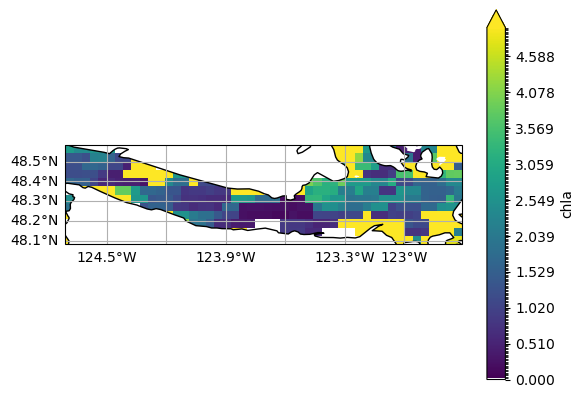

In [43]:
# This plots the concentration of chlorophyll a on a color map over the coordinates 48.6N, 48.1N, 124.7W, 122.7W on a scale or 
# 0 mg/m^3 to 5 mg/m^3.
chla = pigments['chla']
utils.plot_pigments(pigments['chla'], 0, 5)

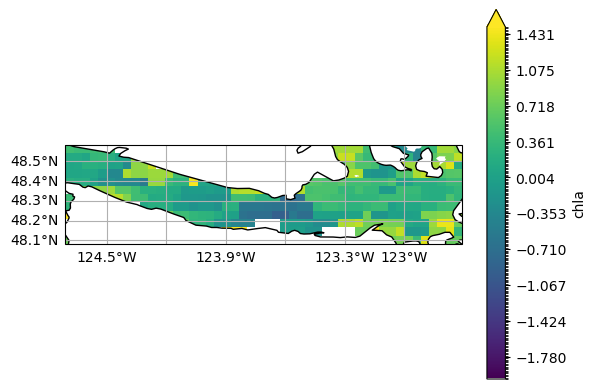

In [44]:
# plot chlorophyll a on a log 10 scale. Note how the scale of the color bar has changed from 0 to 5 and is now -2 to 1.5
import numpy as np
log_chla = np.log10(chla)
utils.plot_pigments(log_chla, -2, 1.5)

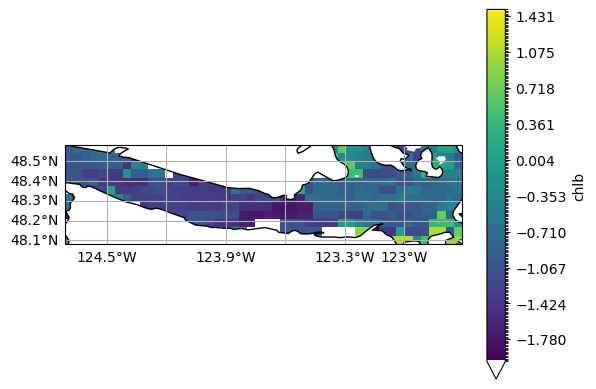

In [45]:
# plot chlorophyll b on a log 10 scale
chlb = pigments['chlb']
log_chlb = np.log10(chlb)
utils.plot_pigments(log_chlb, -2, 1.5)

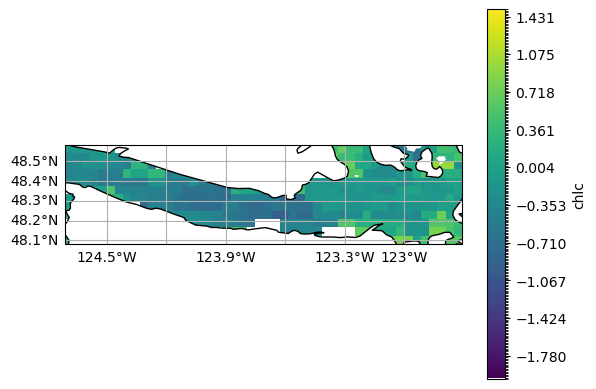

In [46]:
# plot chlorophyll c on a log 10 scale
chlc = pigments['chlc']
log_chlc = np.log10(chlc)
utils.plot_pigments(log_chlc, -2, 1.5)

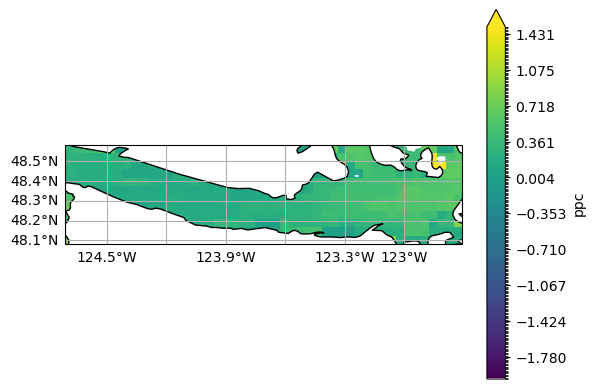

In [47]:
# plot PPC on a log 10 scale
ppc = pigments['ppc']
log_ppc = np.log10(ppc)
utils.plot_pigments(ppc, -2, 1.5)

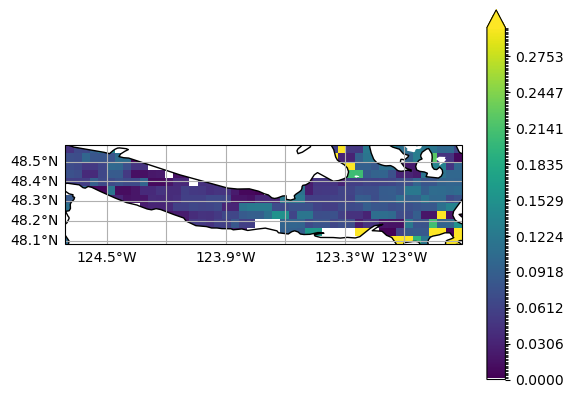

In [49]:
# plot the ratio between chlb and chla
ba_ratio = chlb/chla
utils.plot_pigments(ba_ratio, 0, 0.3)

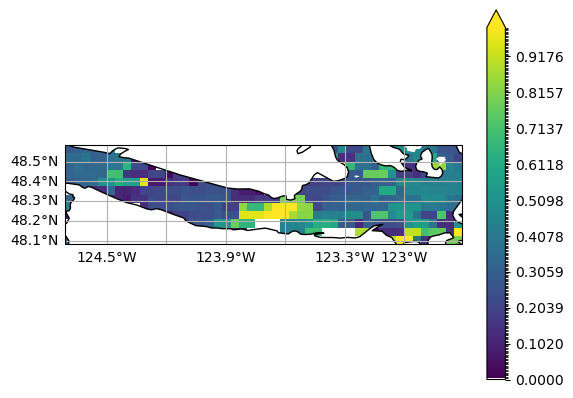

In [54]:
# plot the ratio between chlc and chla, note the difference of the color bar scale from the last plot
ca_ratio = chlc/chla
utils.plot_pigments(ca_ratio, 0, 1)